In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np


In [11]:
def read_plaket(path, file_name, chains, conf_max):
    data = []
    for chain in chains:
        for i in range(conf_max+1):
            file_path = f'{path}/{chain}/{file_name}_{i:04}'
            # print(file_path)
            if (os.path.isfile(file_path)):
                data.append(pd.read_csv(file_path))
                data[-1]['conf'] = i
                data[-1]['chain'] = chain
    return pd.concat(data)

def plot_plaket_therm(data):
    # data = data[data['conf'] >= 0]
    # data = data[data['conf'] <= 100]
    fg = seaborn.FacetGrid(data=data, hue='chain', height=5, aspect=1.2)
    fg.map(plt.plot, 'conf', 'plaket').add_legend()
    # plt.yscale('log')
    # plt.xscale('log')

def plaket_mean(data):
    # data = data[data['conf'] >= 40]
    n = data['plaket'].size
    result =  data['plaket'].agg([np.mean, np.std])
    result['std'] = result['std'] / math.sqrt(n)
    return result

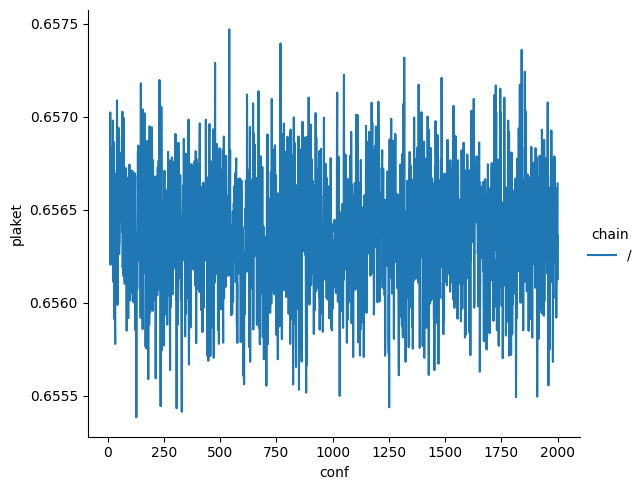

In [14]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x8/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 10]
plot_plaket_therm(data)

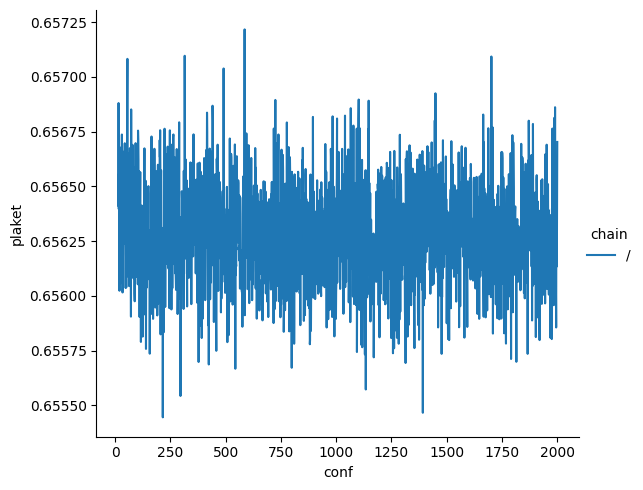

In [19]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x16/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 15]
plot_plaket_therm(data)

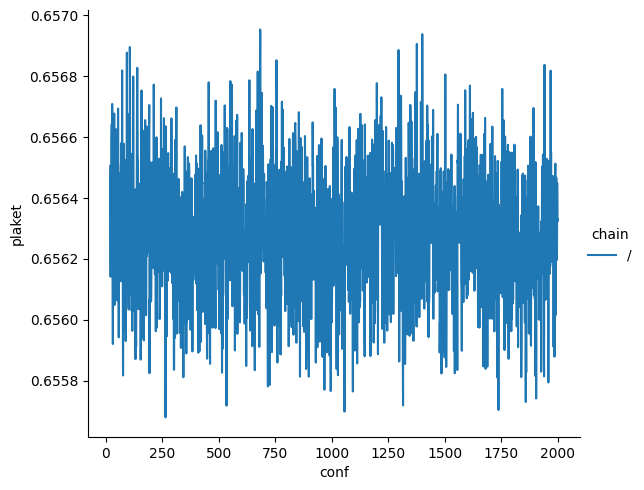

In [22]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x20/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 20]
plot_plaket_therm(data)

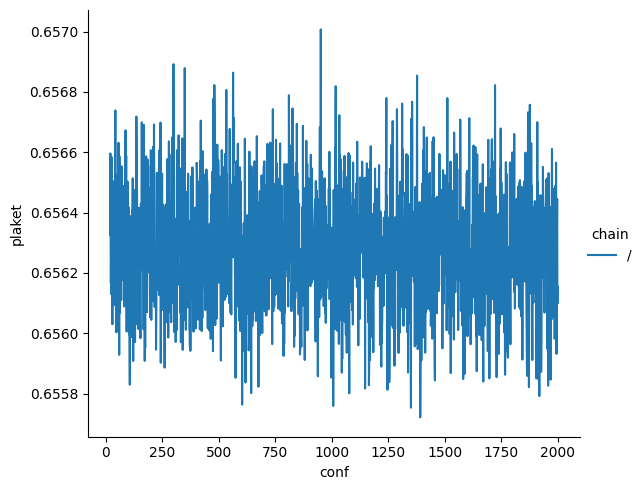

In [23]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x24/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 20]
plot_plaket_therm(data)

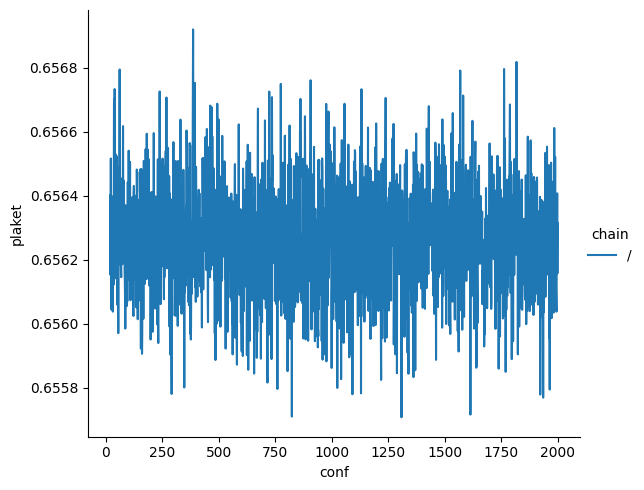

In [24]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x28/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 20]
plot_plaket_therm(data)

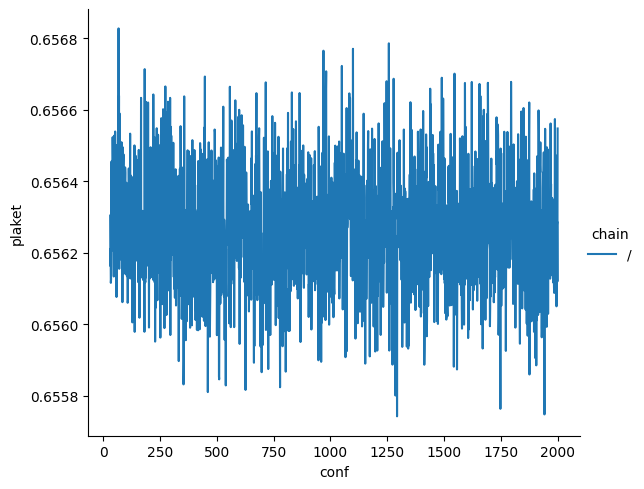

In [26]:
chains = ['/']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x32/mu0.15/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 30]
plot_plaket_therm(data)

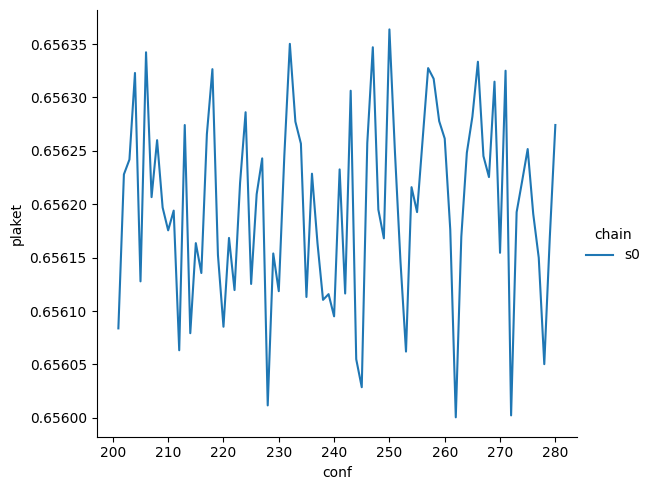

In [29]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.35/original', 'plaket', chains, 9999)
data = data[data['conf'] >= 10]
plot_plaket_therm(data)

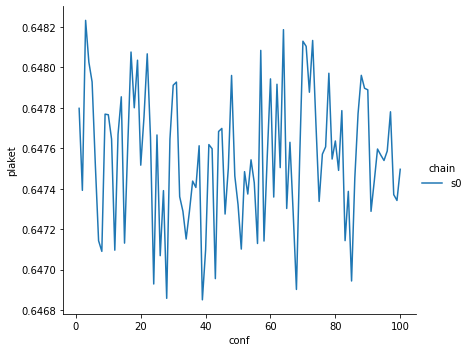

In [3]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/gluodynamics/32^3x8/beta2.478/original', 'plaket', chains, 9999)
plot_plaket_therm(data)

In [8]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/gluodynamics/32^3x8/beta2.478/original', 'plaket', chains, 9999)
print(plaket_mean(data))

mean    0.647548
std     0.000004
Name: plaket, dtype: float64


In [4]:
chains = ['s5']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656213
std     0.000004
Name: plaket, dtype: float64


In [27]:
chains = ['s6']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656219
std     0.000003
Name: plaket, dtype: float64


In [6]:
chains = ['s0', 's1', 's2', 's3', 's4']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656219
std     0.000005
Name: plaket, dtype: float64


In [7]:
chains = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.35/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656196
std     0.000003
Name: plaket, dtype: float64


In [8]:
chains = ['s9']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.35/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656206
std     0.000005
Name: plaket, dtype: float64


In [9]:
chains = ['s10']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.35/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656208
std     0.000005
Name: plaket, dtype: float64


In [74]:
chains = ['s0', 's1']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656288
std     0.000005
Name: plaket, dtype: float64


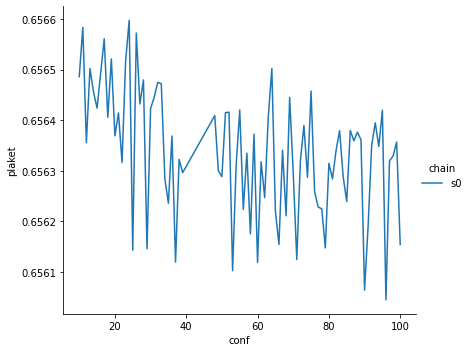

In [71]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
plot_plaket_therm(data)

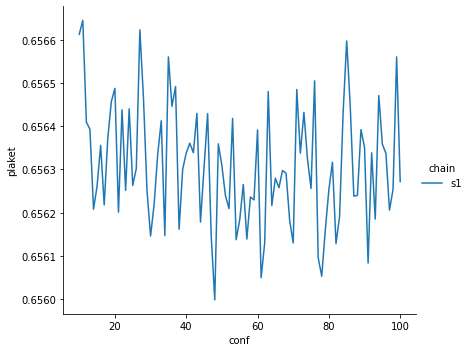

In [72]:
chains = ['s1']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
plot_plaket_therm(data)

In [ ]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/gluodynamics/32^3x8/beta2.478/original', 'plaket', chains, 9999)
plot_plaket_therm(data)

In [5]:
def binning_dependence(path):
    data = pd.read_csv(path)

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'bin_size', 'plaket_jackknife', 'err_jackknife', marker="o", fmt='', linestyle = '')

    plt.show()

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'bin_size', 'plaket', 'err', marker="o", fmt='', linestyle = '')

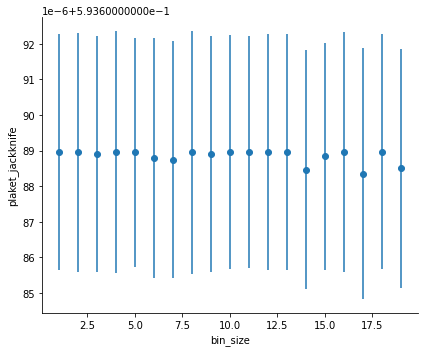

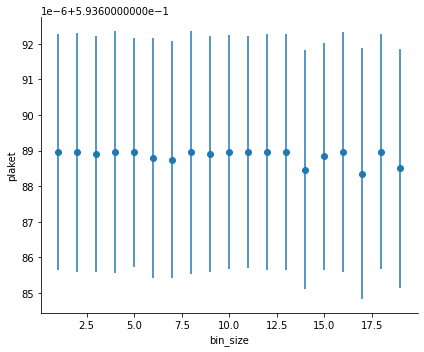

In [6]:
binning_dependence(f'../result/plaket/su3/gluodynamics/24^4/beta6.0/plaket_binning_su3.csv')

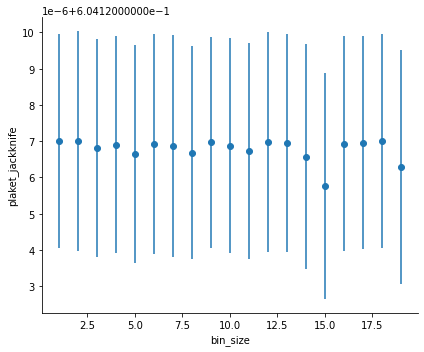

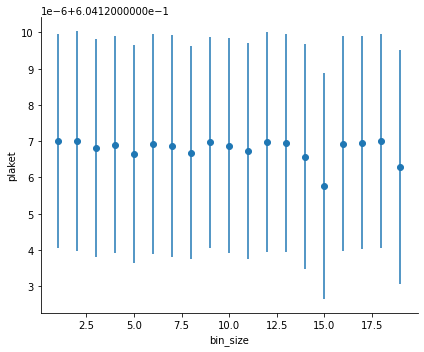

In [9]:
binning_dependence(f'../result/plaket/su3/gluodynamics/28^4/beta6.1/plaket_binning_su3.csv')

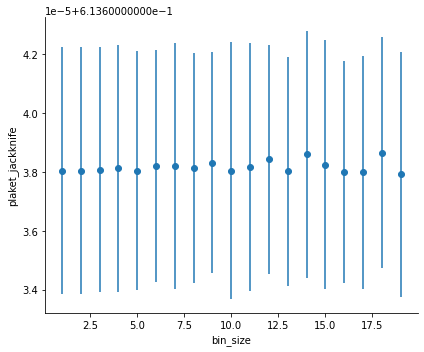

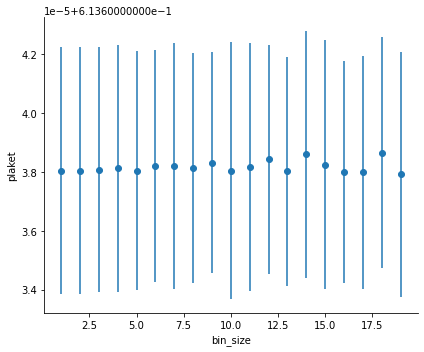

In [10]:
binning_dependence(f'../result/plaket/su3/gluodynamics/32^4/beta6.2/plaket_binning_su3.csv')

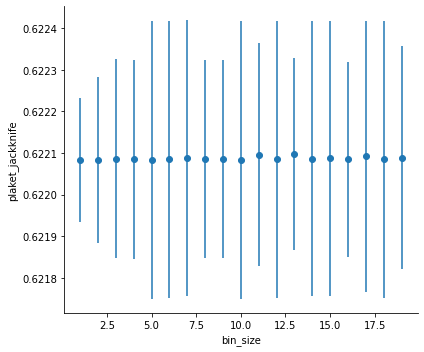

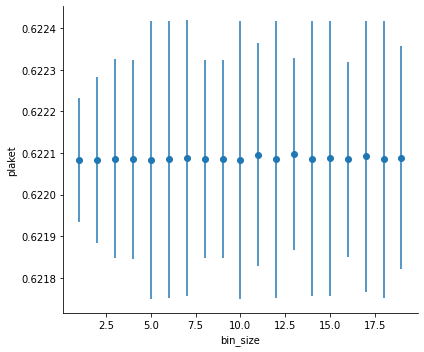

In [8]:
binning_dependence(f'../result/plaket/su3/gluodynamics/36^4/beta6.3/plaket_binning_su3.csv')

In [18]:
# plaket mag dependence
def read_plaket_mag(path, copy_num, conf_num):
    data = []
    for i in range(conf_num):
        for j in range(copy_num):
            file_path = f'{path}/plaket_{i:04}_{j}'
            if (os.path.isfile(file_path)):
                data.append(pd.read_csv(file_path))
                data[-1]['conf'] = i
                data[-1]['copy'] = j
    return pd.concat(data)

def read_mag(path, conf_num):
    data = []
    for i in range(conf_num):
        file_path = f'{path}/functional_{i:04}'
        if (os.path.isfile(file_path)):
            data.append(pd.read_csv(file_path))
            data[-1]['conf'] = i
            data[-1]['copy'] = data[-1]['copy'] + 1
    return pd.concat(data)

In [25]:
path = '/home/ilya/soft/lattice/observables/data/plaket/su3/gluodynamics/24^4/beta6.0/abelian/steps_100/copies=20/0.01'
data1 = read_plaket_mag(path, 20, 1000)
data1['steps'] = 100
path = '/home/ilya/soft/lattice/observables/data/plaket/su3/gluodynamics/24^4/beta6.0/abelian/steps_4000/copies=20/0.01'
data2 = read_plaket_mag(path, 20, 1000)
data2['steps'] = 4000
data = pd.concat([data1, data2])
print(data)
path_func = '/home/ilya/soft/lattice/observables/data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01'
data_func1 = read_mag(path_func, 1000)
data_func1['steps'] = 100
path_func = '/home/ilya/soft/lattice/observables/data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01'
data_func2 = read_mag(path_func, 1000)
data_func2['steps'] = 4000
data_func = pd.concat([data_func1, data_func2])
print(data_func)
data = data.merge(data_func, how='inner', on=['conf', 'copy', 'steps'])
print(data)

      plaket  plaket_space  plaket_time  conf  copy  steps
0   0.809013      0.809050     0.808975     1     1    100
0   0.809238      0.809195     0.809282     1     3    100
0   0.809483      0.809281     0.809685     2     1    100
0   0.809355      0.809212     0.809498     2     3    100
0   0.809427      0.809058     0.809796     2     5    100
..       ...           ...          ...   ...   ...    ...
0   0.809626      0.809596     0.809656   683    11   4000
0   0.809617      0.809525     0.809709   684     1   4000
0   0.810233      0.810247     0.810220   684     2   4000
0   0.810392      0.810380     0.810404   684     4   4000
0   0.810247      0.810105     0.810388   684     6   4000

[5872 rows x 6 columns]
   copy  functional  conf  steps
0     1    0.822665     1    100
1     2    0.822520     1    100
2     3    0.822733     1    100
3     4    0.822693     1    100
4     5    0.822716     1    100
..  ...         ...   ...    ...
15   16    0.823199   684   4000
16 

In [28]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass

    output_path = f'{image_path}/{image_name}'
    print(output_path)
    fg.savefig(output_path, dpi=800, facecolor='white')

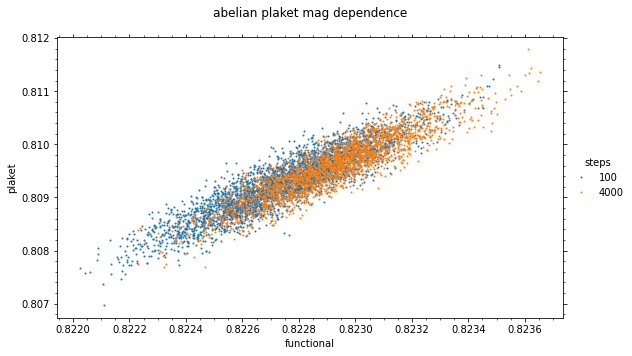

../images/plaket/su3/beta6.0/abelian/mag_dependence/abelian_plaket_mag_dependence_beta6p0


In [30]:
fg = seaborn.FacetGrid(data=data, hue='steps', height=5,
                           aspect=1.61, legend_out=True)
fg.figure.suptitle(f'abelian plaket mag dependence')
fg.map(plt.errorbar, 'functional', 'plaket', mfc=None, fmt='o', ms=1, capsize=5, lw=0.5, ls=None
       ).add_legend()
fg.ax.set_xlabel('functional')
fg.ax.set_ylabel('plaket')
fg.ax.spines['right'].set_visible(True)
fg.ax.spines['top'].set_visible(True)
fg.ax.minorticks_on()
fg.ax.tick_params(which='both', bottom=True,
                      top=True, left=True, right=True)
plt.show()

save_image('../images/plaket/su3/beta6.0/abelian/mag_dependence', 'abelian_plaket_mag_dependence_beta6p0', fg)